# **1. Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
df = pd.read_csv('Dataset_inisiasi.csv')
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1,93.769249,3
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,2
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,0
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,0
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,2


In [3]:
# mengubah data kategrorik menjadi numerik menggunakan label encoding

categorical_features = ['Ship_Type','Route_Type','Engine_Type','Maintenance_Status','Weather_Condition']

label_encoder = LabelEncoder()

# melakukan encoding untuk fitur kategorik
for feature in categorical_features :
    df[feature] = label_encoder.fit_transform(df[feature])

df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,1,1,1,0,12.597558,2062.983982,1030.943616,14.132284,1,1959.017882,483832.354540,292183.273104,25.867077,1,93.769249,3
1,2,2,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,2
2,1,1,0,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,0
3,0,3,2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,0
4,2,3,0,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,2


# **3. Data Splitting**

Kita akan membagi dataset menjadi **80% data train dan 20% data test**

In [4]:
# memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']
 
# split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# cek hasil splitting
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2188, 15), y_train=(2188,)
Test set shape: X_test=(548, 15), y_test=(548,)


# **4. Membangun Model Klasifikasi**

Pada project ini, kita akan menggunakan 2 algoritma yaitu **Random Forest dan XGBoost** yang sama-sama based tree models :
- **Random Forest** adalah ensemble learning method berbasis bagging, yang menggabungkan banyak decision tree untuk meningkatkan akurasi dan mengurangi overfitting.
- **XGBoost** adalah metode boosting yang membangun decision tree secara bertahap, di mana setiap tree baru memperbaiki kesalahan tree sebelumnya.

## a. Membangun Model Klasifikasi

In [5]:
# random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# xgboost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=4, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=4, num_parallel_tree=1, objective='multi:softmax',
              predictor='auto', random_state=42, ...)

## b. Evaluasi Model Klasifikasi

Untuk evaluasi model, kita menggunakan **metrik accuracy, precision, recall, dan F1-Score**

In [6]:
# Prediksi menggunakan model yang telah dilatih
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [7]:
# menghitung metrik evaluasi

# evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# evaluasi XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print hasil evaluasi
print("=== Evaluasi Model Random Forest ===")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}\n")

print("=== Evaluasi Model XGBoost ===")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

=== Evaluasi Model Random Forest ===
Accuracy: 0.9416
Precision: 0.9421
Recall: 0.9416
F1-Score: 0.9416

=== Evaluasi Model XGBoost ===
Accuracy: 0.9580
Precision: 0.9583
Recall: 0.9580
F1-Score: 0.9580


**Perbandingan Kinerja Model :**
- Akurasi: **XGBoost mencapai 95.80%, lebih tinggi** dibandingkan Random Forest yang memperoleh 94.16%.
- Precision, Recall, dan F1-Score: **Semua metrik pada XGBoost lebih tinggi** dibandingkan Random Forest, yang menunjukkan bahwa model ini lebih konsisten dalam membuat prediksi yang benar.

Hal ini menunjukkan **algoritma XGBoost lebih akurat dan konsisten.**

## c. Tuning Model Klasifikasi

Pada project ini, kita akan tuning model menggunakan **GridSearchCV**

In [8]:
# tuning model XGBoost untuk meningkatkan performa dengan GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# parameter yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy: 0.956126175219698


## d. Evaluasi Model Klasifikasi setelah Tuning

In [9]:
# menggunakan model dengan hyperparameter terbaik
best_params = grid_search.best_params_
xgb_tuned = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_tuned.fit(X_train, y_train)

# evaluasi kembali dengan data uji
y_pred_tuned = xgb_tuned.predict(X_test)

=== Evaluasi di Training Set ===
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

=== Evaluasi di Testing Set ===
Accuracy: 0.9599
Precision: 0.9603
Recall: 0.9599
F1-Score: 0.9598


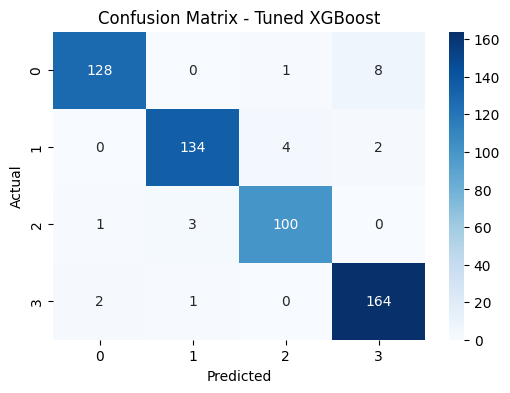

In [10]:
# prediksi di training & testing set
y_train_pred = xgb_tuned.predict(X_train)
y_test_pred = xgb_tuned.predict(X_test)

# evaluasi di training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# evaluasi di testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print hasil evaluasi
print("=== Evaluasi di Training Set ===")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}\n")

print("=== Evaluasi di Testing Set ===")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")

# confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# plot confusion matrix untuk XGBoost yang sudah dituning
plot_confusion_matrix(y_test, y_pred_tuned, "Tuned XGBoost")

## e. Analisis Hasil Evaluasi Model Klasifikasi

1️⃣ **Perbandingan Sebelum & Setelah Tuning**
Setelah dilakukan tuning, **model XGBoost mengalami peningkatan performa**. Akurasi meningkat dari **95.80%** menjadi **95.99%**, dan metrik evaluasi lainnya juga menunjukkan peningkatan serupa. Hal ini menandakan bahwa optimasi hyperparameter berhasil meningkatkan kualitas prediksi model.

2️⃣ **Identifikasi Kelemahan Model**
- Potensi Overfitting: <br>
  Metrik evaluasi akurasi di training set mencapai 100%, sedangkan di testing set hanya 95.99%. Selisih ini cukup besar, mengindikasikan bahwa model mungkin terlalu kompleks dan terlalu menyesuaikan diri dengan data training, sehingga bisa mengalami overfitting.
- Analisis Confusion Matrix: <br>
  Dari confusion matrix, sebagian besar prediksi model sudah benar, namun ada beberapa kesalahan klasifikasi
  
3️⃣ **Rekomendasi Tindakan Lanjutan** <br>
Untuk mengatasi overfitting dan meningkatkan generalisasi model:
- Menurunkan max_depth agar model tidak terlalu kompleks
- Menambahkan untuk menghindari model terlalu spesifik ke data training
- Jika model masih belum optimal, bisa mencoba algoritma lain seperti LightGBM atau CatBoost untuk membandingkan performanya

**Secara keseluruhan, Tuned XGBoost sudah memiliki performa tinggi, tetapi masih ada ruang untuk peningkatan dalam menangani kesalahan klasifikasi pada kelas tertentu dan mengurangi potensi overfitting.**